Importing libaries 

In [775]:
import pandas as pd
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# IMPORT AND CLEANING

We import that dataframe and remove 2020-10 to 2021-04 since we are missing some values, and this data is during Covid so to avoid that skew we removed the data

In [776]:
df = pd.read_csv(Path('Resources\DataforMLtesting.csv'))
df = df[~df['REF_DATE'].isin(['2020-10', '2021-01', '2021-04'])]
df.head()

,Unnamed: 0,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,VALUE,STATUS
0,1233457,2015-04,Newfoundland and Labrador,2016A000210,"Business, finance and administration occupatio...",Full-time,Job vacancies,430.0,D
1,1242071,2015-04,Newfoundland and Labrador,2016A000210,Natural and applied sciences and related occup...,Full-time,Job vacancies,170.0,D
2,1251511,2015-04,Newfoundland and Labrador,2016A000210,Health occupations [3],Full-time,Job vacancies,265.0,D
3,1251514,2015-04,Newfoundland and Labrador,2016A000210,Health occupations [3],Part-time,Job vacancies,260.0,D
4,1257411,2015-04,Newfoundland and Labrador,2016A000210,"Occupations in education, law and social, comm...",Full-time,Job vacancies,130.0,D


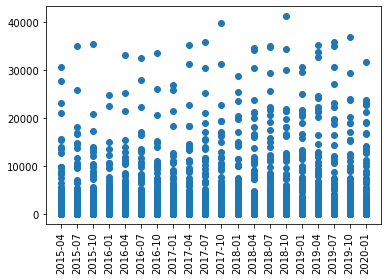

In [777]:
plt.scatter(df.REF_DATE, df.VALUE)
plt.xticks(rotation = 90)
plt.show()

Dropping uneeded columns for encoding, and renaming column names for easier access

In [778]:
df.columns
df = df.drop(["Unnamed: 0","DGUID","Statistics","STATUS"],axis=1)
df.columns.values[2] = "NOC"
df.columns.values[3] = "JOB_CHAR"


In [779]:
df.iloc[:,1:4]

,GEO,NOC,JOB_CHAR
0,Newfoundland and Labrador,"Business, finance and administration occupatio...",Full-time
1,Newfoundland and Labrador,Natural and applied sciences and related occup...,Full-time
2,Newfoundland and Labrador,Health occupations [3],Full-time
3,Newfoundland and Labrador,Health occupations [3],Part-time
4,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time
...,...,...,...
2961,Nunavut,"Business, finance and administration occupatio...",Full-time
2962,Nunavut,Natural and applied sciences and related occup...,Full-time
2963,Nunavut,Natural and applied sciences and related occup...,Part-time
2964,Nunavut,"Trades, transport and equipment operators and ...",Full-time


# ENCODING 

Here we do label encoding on columns GEO, NOC, JOB_CHAR then we do OneHotEncoding on each of the columns and merge them and remove the original column. 

In [780]:
LE= LabelEncoder()
for column in df.iloc[:,1:4]:
    df[column]=LE.fit_transform(df[column])
df

,REF_DATE,GEO,NOC,JOB_CHAR,VALUE
0,2015-04,4,0,0,430.0
1,2015-04,4,3,0,170.0
2,2015-04,4,1,0,265.0
3,2015-04,4,1,1,260.0
4,2015-04,4,6,0,130.0
...,...,...,...,...,...
2961,2020-01,7,0,0,55.0
2962,2020-01,7,3,0,45.0
2963,2020-01,7,3,1,0.0
2964,2020-01,7,9,0,85.0


In [781]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df.GEO.values.reshape(-1,1)))
encode_df.columns = enc.get_feature_names(['Province'])
encode_df.head()

,Province_0,Province_1,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,Province_8,Province_9,Province_10,Province_11,Province_12
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [782]:
encode_df2 = pd.DataFrame(enc.fit_transform(df.NOC.values.reshape(-1,1)))
encode_df2.columns = enc.get_feature_names(['NOC'])
encode_df2.head()

,NOC_0,NOC_1,NOC_2,NOC_3,NOC_4,NOC_5,NOC_6,NOC_7,NOC_8,NOC_9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [783]:
encode_df3 = pd.DataFrame(enc.fit_transform(df.JOB_CHAR.values.reshape(-1,1)))
encode_df3.columns = enc.get_feature_names(['JOB_CHAR'])
encode_df3.head()

,JOB_CHAR_0,JOB_CHAR_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [784]:
df = df.merge(encode_df,left_index=True,right_index=True).drop("GEO",1)
df = df.merge(encode_df2,left_index=True,right_index=True).drop("NOC",1)
df = df.merge(encode_df3,left_index=True,right_index=True).drop("JOB_CHAR",1)
df

C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,REF_DATE,VALUE,Province_0,Province_1,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,...,NOC_2,NOC_3,NOC_4,NOC_5,NOC_6,NOC_7,NOC_8,NOC_9,JOB_CHAR_0,JOB_CHAR_1
0,2015-04,430.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015-04,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-04,265.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015-04,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-04,130.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,2020-01,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2962,2020-01,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2963,2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2964,2020-01,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [785]:
df['REF_DATE'].nunique()


20

Converting REF_DATE to datetime then to int64 to be used for linear regression model

In [786]:
df["REF_DATE"] = pd.to_datetime(df["REF_DATE"],format="%Y-%m")
df['REF_DATE']=df['REF_DATE'].map(dt.datetime.toordinal)


In [787]:
df['REF_DATE'].nunique()


20

In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966 entries, 0 to 2965
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REF_DATE     2966 non-null   int64  
 1   VALUE        2966 non-null   float64
 2   Province_0   2966 non-null   float64
 3   Province_1   2966 non-null   float64
 4   Province_2   2966 non-null   float64
 5   Province_3   2966 non-null   float64
 6   Province_4   2966 non-null   float64
 7   Province_5   2966 non-null   float64
 8   Province_6   2966 non-null   float64
 9   Province_7   2966 non-null   float64
 10  Province_8   2966 non-null   float64
 11  Province_9   2966 non-null   float64
 12  Province_10  2966 non-null   float64
 13  Province_11  2966 non-null   float64
 14  Province_12  2966 non-null   float64
 15  NOC_0        2966 non-null   float64
 16  NOC_1        2966 non-null   float64
 17  NOC_2        2966 non-null   float64
 18  NOC_3        2966 non-null   float64
 19  NOC_4 

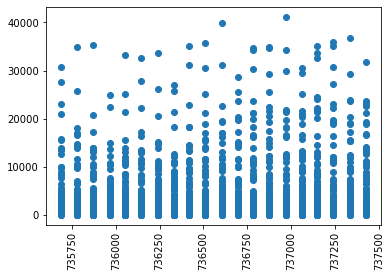

In [789]:
plt.scatter(df.REF_DATE, df.VALUE)
plt.xticks(rotation = 90)
plt.show()

# SPLITTING DATA FOR ML MODEL


In [790]:
cols = df.columns.tolist()
cols = cols[1:] + cols[:1]
df = df[cols]
df


,VALUE,Province_0,Province_1,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,Province_8,...,NOC_3,NOC_4,NOC_5,NOC_6,NOC_7,NOC_8,NOC_9,JOB_CHAR_0,JOB_CHAR_1,REF_DATE
0,430.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,735689
1,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,735689
2,265.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,735689
3,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,735689
4,130.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,735689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,737425
2962,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,737425
2963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,737425
2964,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,737425


In [791]:
Y = df.iloc[:,0]
Y

0       430.0
1       170.0
2       265.0
3       260.0
4       130.0
        ...  
2961     55.0
2962     45.0
2963      0.0
2964     85.0
2965      0.0
Name: VALUE, Length: 2966, dtype: float64

In [792]:
X = df.iloc[:,1:]
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
X = X[cols]
X

,REF_DATE,Province_0,Province_1,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,Province_8,...,NOC_2,NOC_3,NOC_4,NOC_5,NOC_6,NOC_7,NOC_8,NOC_9,JOB_CHAR_0,JOB_CHAR_1
0,735689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,735689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,735689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,735689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,735689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2962,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2963,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2964,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [793]:
X.shape, Y.shape

((2966, 26), (2966,))

In [794]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((2372, 26), (2372,))

In [795]:
X_test.shape, Y_test.shape

((594, 26), (594,))

# LINEAR REGRESSION MODEL


Defines the regrssion model

In [796]:
model = linear_model.LinearRegression()

Build training model

In [797]:
model.fit(X_train, Y_train)

LinearRegression()

In [798]:
Y_pred = model.predict(X_test)

In [799]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 6.65186981e-01  1.88897145e+03  3.86122906e+03 -4.60303782e+02
 -1.43595167e+03 -1.84445770e+03 -3.31765883e+03 -1.01162836e+03
 -3.36526961e+03  8.53015713e+03 -2.79733634e+03  3.99019492e+03
 -8.34358520e+02 -3.20358775e+03  7.76330310e+02 -3.74900771e+02
 -7.19314495e+02 -2.10961083e+02 -2.56341671e+03 -2.92728455e+03
 -5.82470957e+02 -1.28665327e+03  5.58208670e+03  2.30658483e+03
  1.22249212e+03 -1.22249212e+03]
Intercept: -489196.2513739157
Mean squared error (MSE): 16374351.67
Coefficient of determination (R^2): 0.56


In [800]:
r2_score(Y_test, Y_pred)

0.5628315729809554

C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VALUE'>

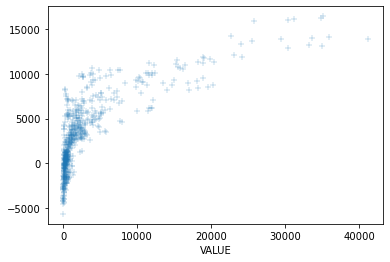

In [803]:
sns.scatterplot(Y_test, Y_pred, marker="+", alpha=0.5)